# グラフ理論とネットワークモデル

In [1]:
using PyCall, PyPlot, Random, ProgressMeter
nx = pyimport("networkx")

PyObject <module 'networkx' from 'C:\\ProgramData\\Miniconda3\\lib\\site-packages\\networkx\\__init__.py'>

## Watts-Strogatz small-world graph

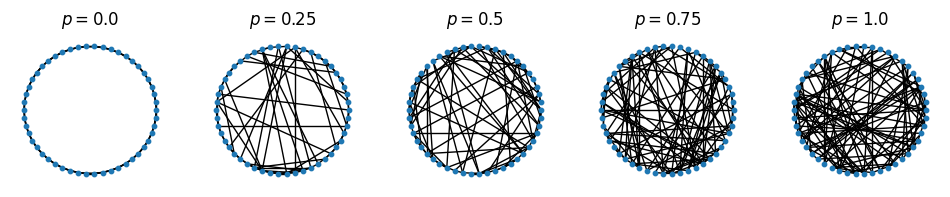

In [2]:
figure(figsize=(12, 2))
for i in 1:5
    subplot(1,5,i)
    G = nx.watts_strogatz_graph(n=50, k=5, p=0.25(i-1))
    nx.draw_circular(G, node_size=10)
    title(L"$p=$"*string(0.25(i-1)))
end
#tight_layout()

##  Erdős-Rényi graph

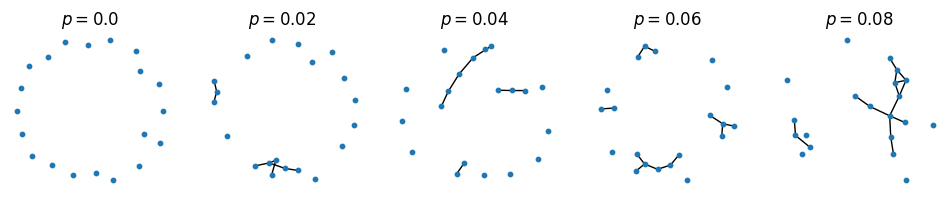

In [3]:
figure(figsize=(12, 2))
for i in 1:5
    subplot(1,5,i)
    G = nx.erdos_renyi_graph(n=20, p=0.02(i-1))
    pos = nx.spring_layout(G, k=0.4)
    nx.draw(G, pos, node_size=10)
    title(L"$p=$"*string(0.02(i-1)))
end
#tight_layout()

In [7]:
N = 200
num_node = 1000
probs = 4*rand(N)/num_node
max_components = zeros(N)
@showprogress for i in 1:N
    G = nx.erdos_renyi_graph(n=num_node, p=probs[i])
    max_components[i] = maximum([length(component) for component in nx.connected_components(G)])
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:07


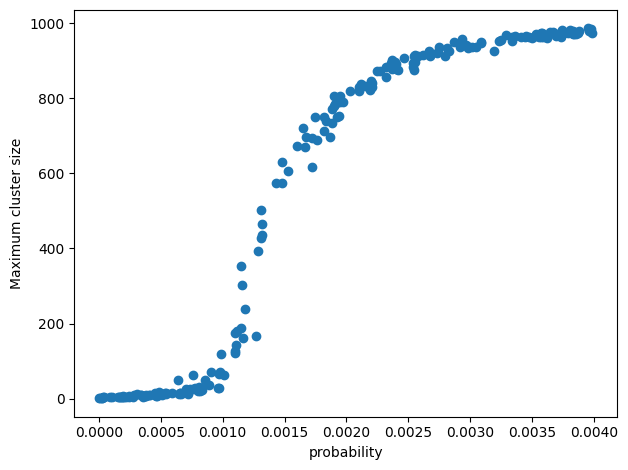

In [5]:
scatter(probs, max_components)
xlabel("probability")
ylabel("Maximum cluster size")
tight_layout()